In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv("diabetes_data.csv")
data.Polyuria = data.Polyuria.eq('Yes').mul(1)
data.Gender = data.Gender.eq('Female').mul(1)
data.Polydipsia = data.Polydipsia.eq('Yes').mul(1)
data['sudden weight loss'] = data['sudden weight loss'].eq('Yes').mul(1)
data.weakness = data.weakness.eq('Yes').mul(1)
data.Polyphagia = data.Polyphagia.eq('Yes').mul(1)
data['Genital thrush'] = data['Genital thrush'].eq('Yes').mul(1)
data['visual blurring'] = data['visual blurring'].eq('Yes').mul(1)
data['Itching'] = data['Itching'].eq('Yes').mul(1)
data['Irritability'] = data['Irritability'].eq('Yes').mul(1)
data['delayed healing'] = data['delayed healing'].eq('Yes').mul(1)
data['partial paresis'] = data['partial paresis'].eq('Yes').mul(1)
data['muscle stiffness'] = data['muscle stiffness'].eq('Yes').mul(1)
data['Alopecia'] = data['Alopecia'].eq('Yes').mul(1)
data['Obesity'] = data['Obesity'].eq('Yes').mul(1)
data['class'] = data['class'].eq('Positive').mul(1)



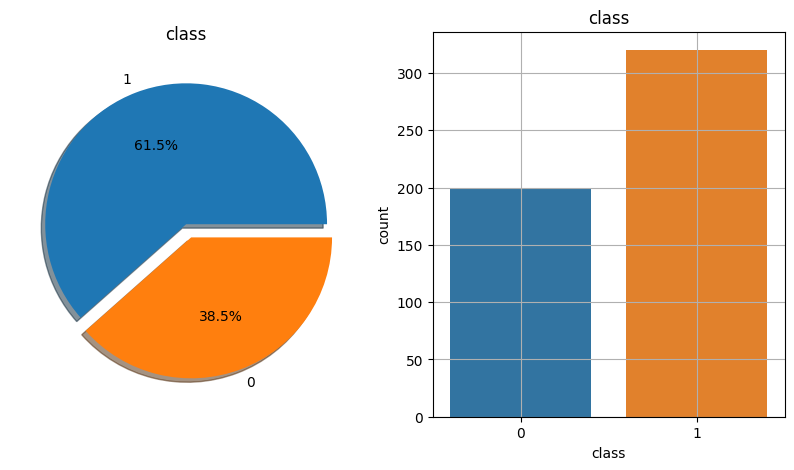

In [4]:
f,ax = plt.subplots(1,2,figsize=(10,5))
data['class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('class')
ax[0].set_ylabel('')
sns.countplot(x=data["class"], data =data,ax=ax[1])
ax[1].set_title('class')
N,P = data['class'].value_counts()
plt.grid()
plt.show()

#imbalanced data

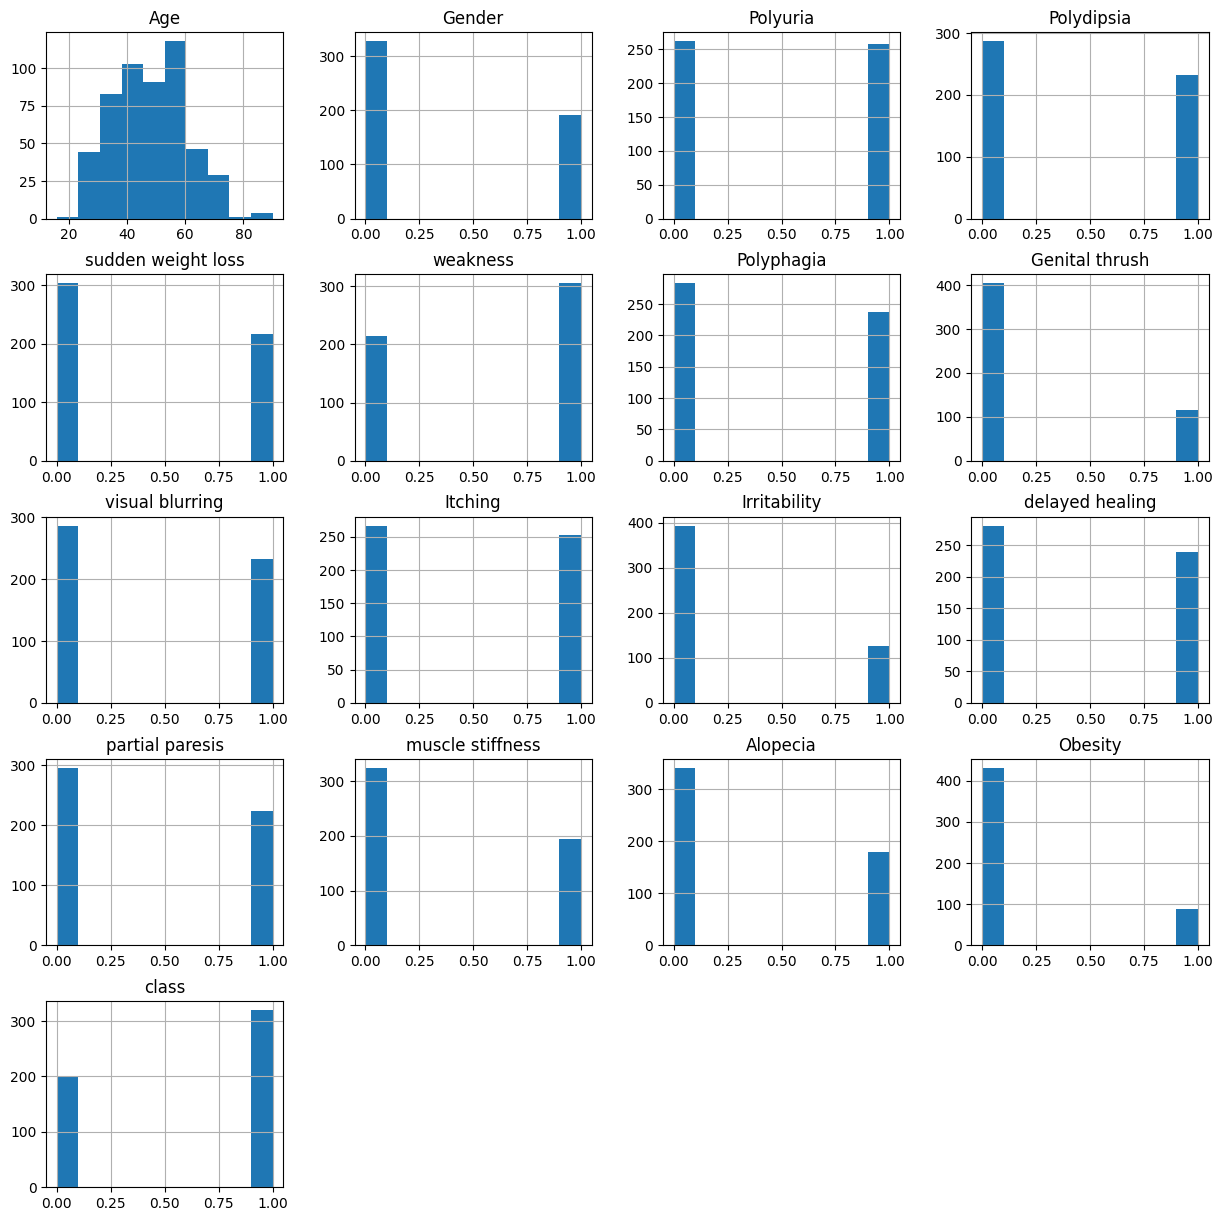

In [6]:
#histogram
data.hist(bins=10,figsize=(15,15))
plt.show()

array([[<AxesSubplot: xlabel='Age', ylabel='Age'>,
        <AxesSubplot: xlabel='Gender', ylabel='Age'>,
        <AxesSubplot: xlabel='Polyuria', ylabel='Age'>,
        <AxesSubplot: xlabel='Polydipsia', ylabel='Age'>,
        <AxesSubplot: xlabel='sudden weight loss', ylabel='Age'>,
        <AxesSubplot: xlabel='weakness', ylabel='Age'>,
        <AxesSubplot: xlabel='Polyphagia', ylabel='Age'>,
        <AxesSubplot: xlabel='Genital thrush', ylabel='Age'>,
        <AxesSubplot: xlabel='visual blurring', ylabel='Age'>,
        <AxesSubplot: xlabel='Itching', ylabel='Age'>,
        <AxesSubplot: xlabel='Irritability', ylabel='Age'>,
        <AxesSubplot: xlabel='delayed healing', ylabel='Age'>,
        <AxesSubplot: xlabel='partial paresis', ylabel='Age'>,
        <AxesSubplot: xlabel='muscle stiffness', ylabel='Age'>,
        <AxesSubplot: xlabel='Alopecia', ylabel='Age'>,
        <AxesSubplot: xlabel='Obesity', ylabel='Age'>,
        <AxesSubplot: xlabel='class', ylabel='Age'>],
      

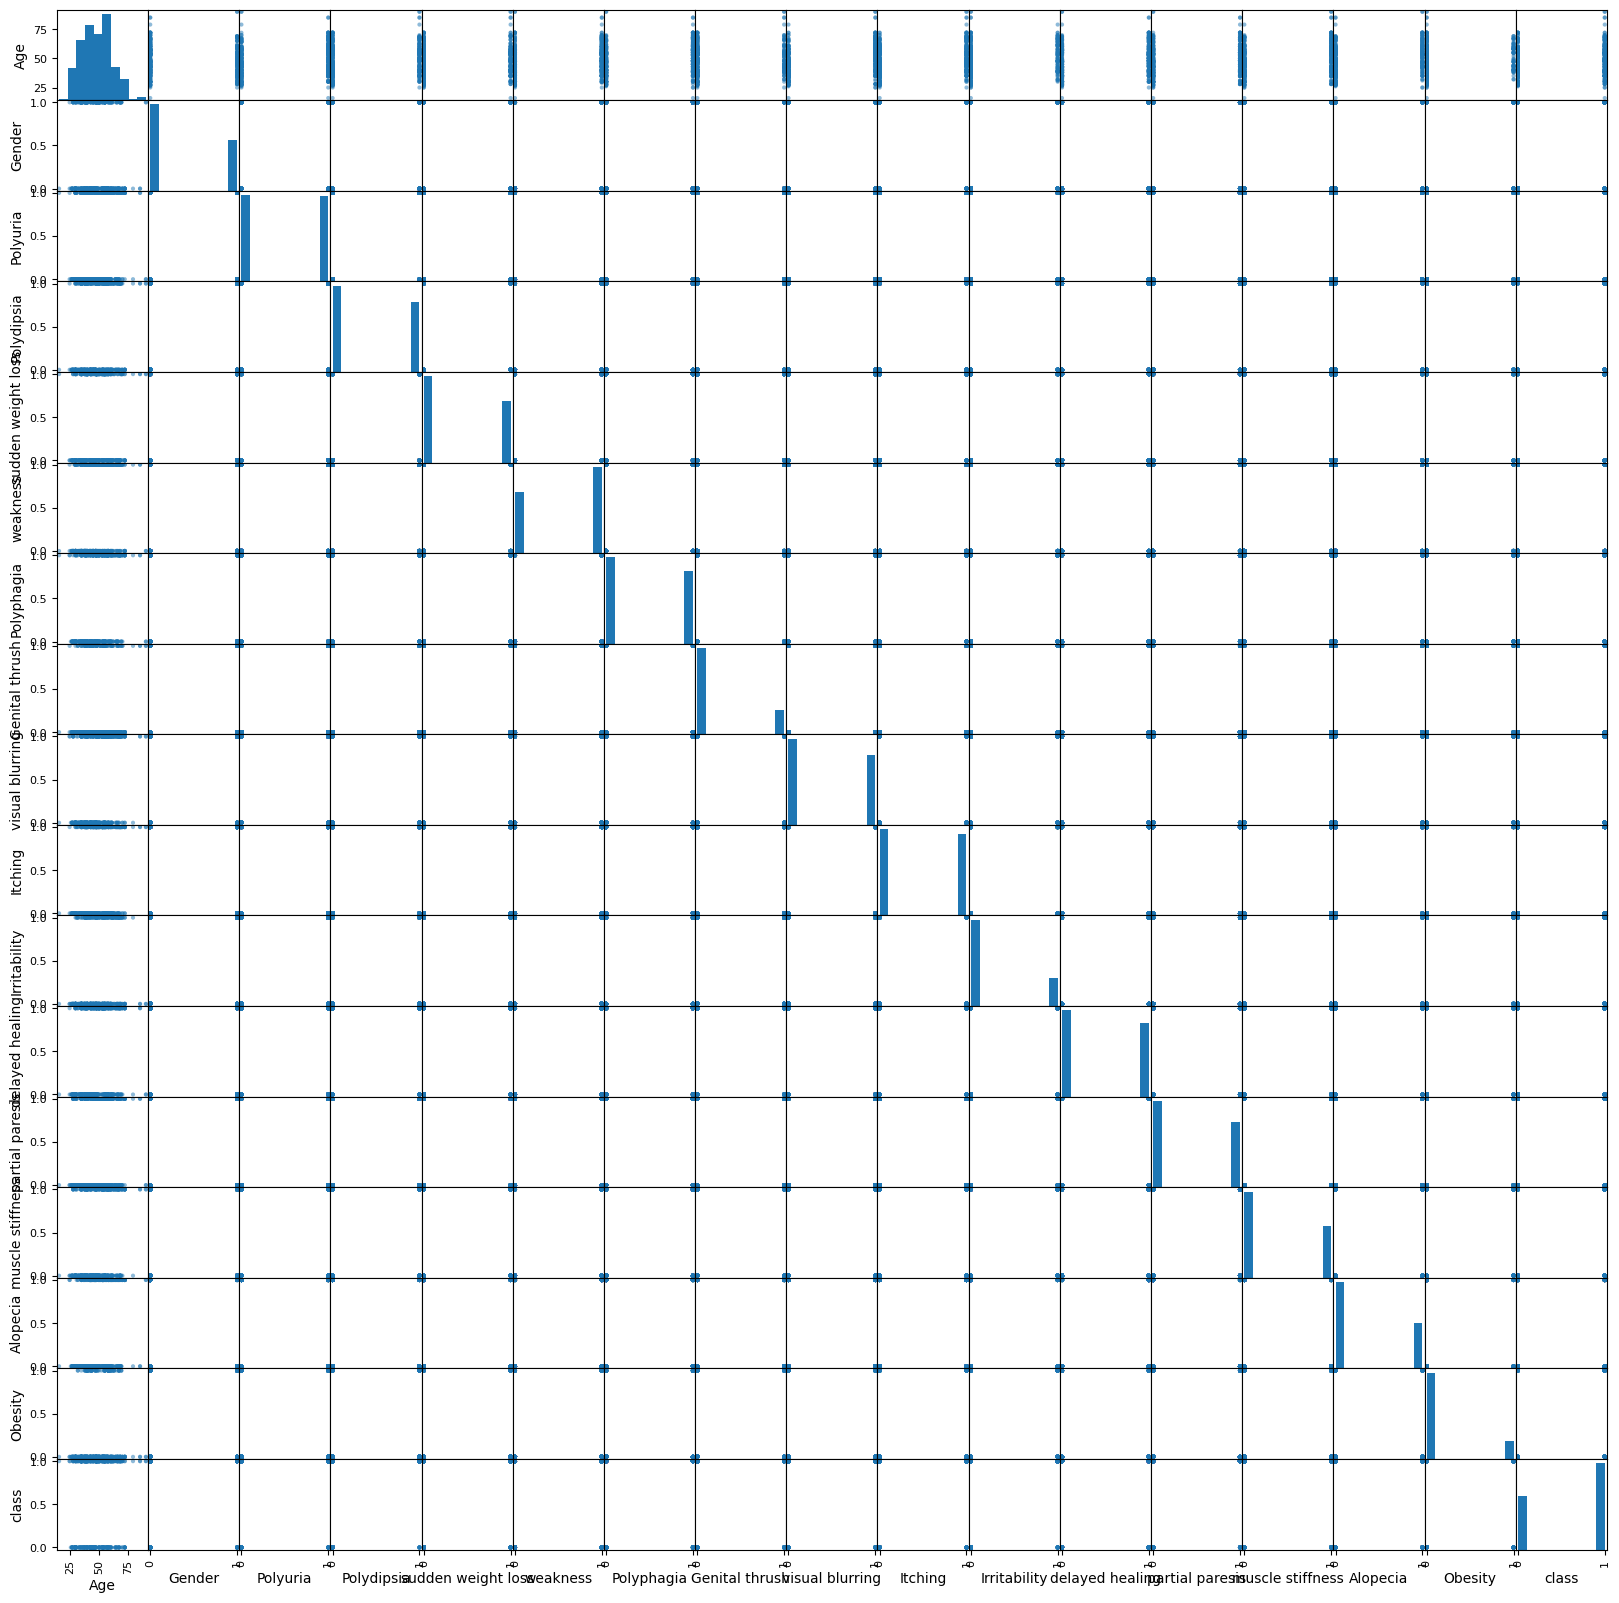

In [7]:
#scatter plot matrix , irrelevant
# from pandas.plotting import scatter_matrix
# scatter_matrix(data,figsize = (20,20))

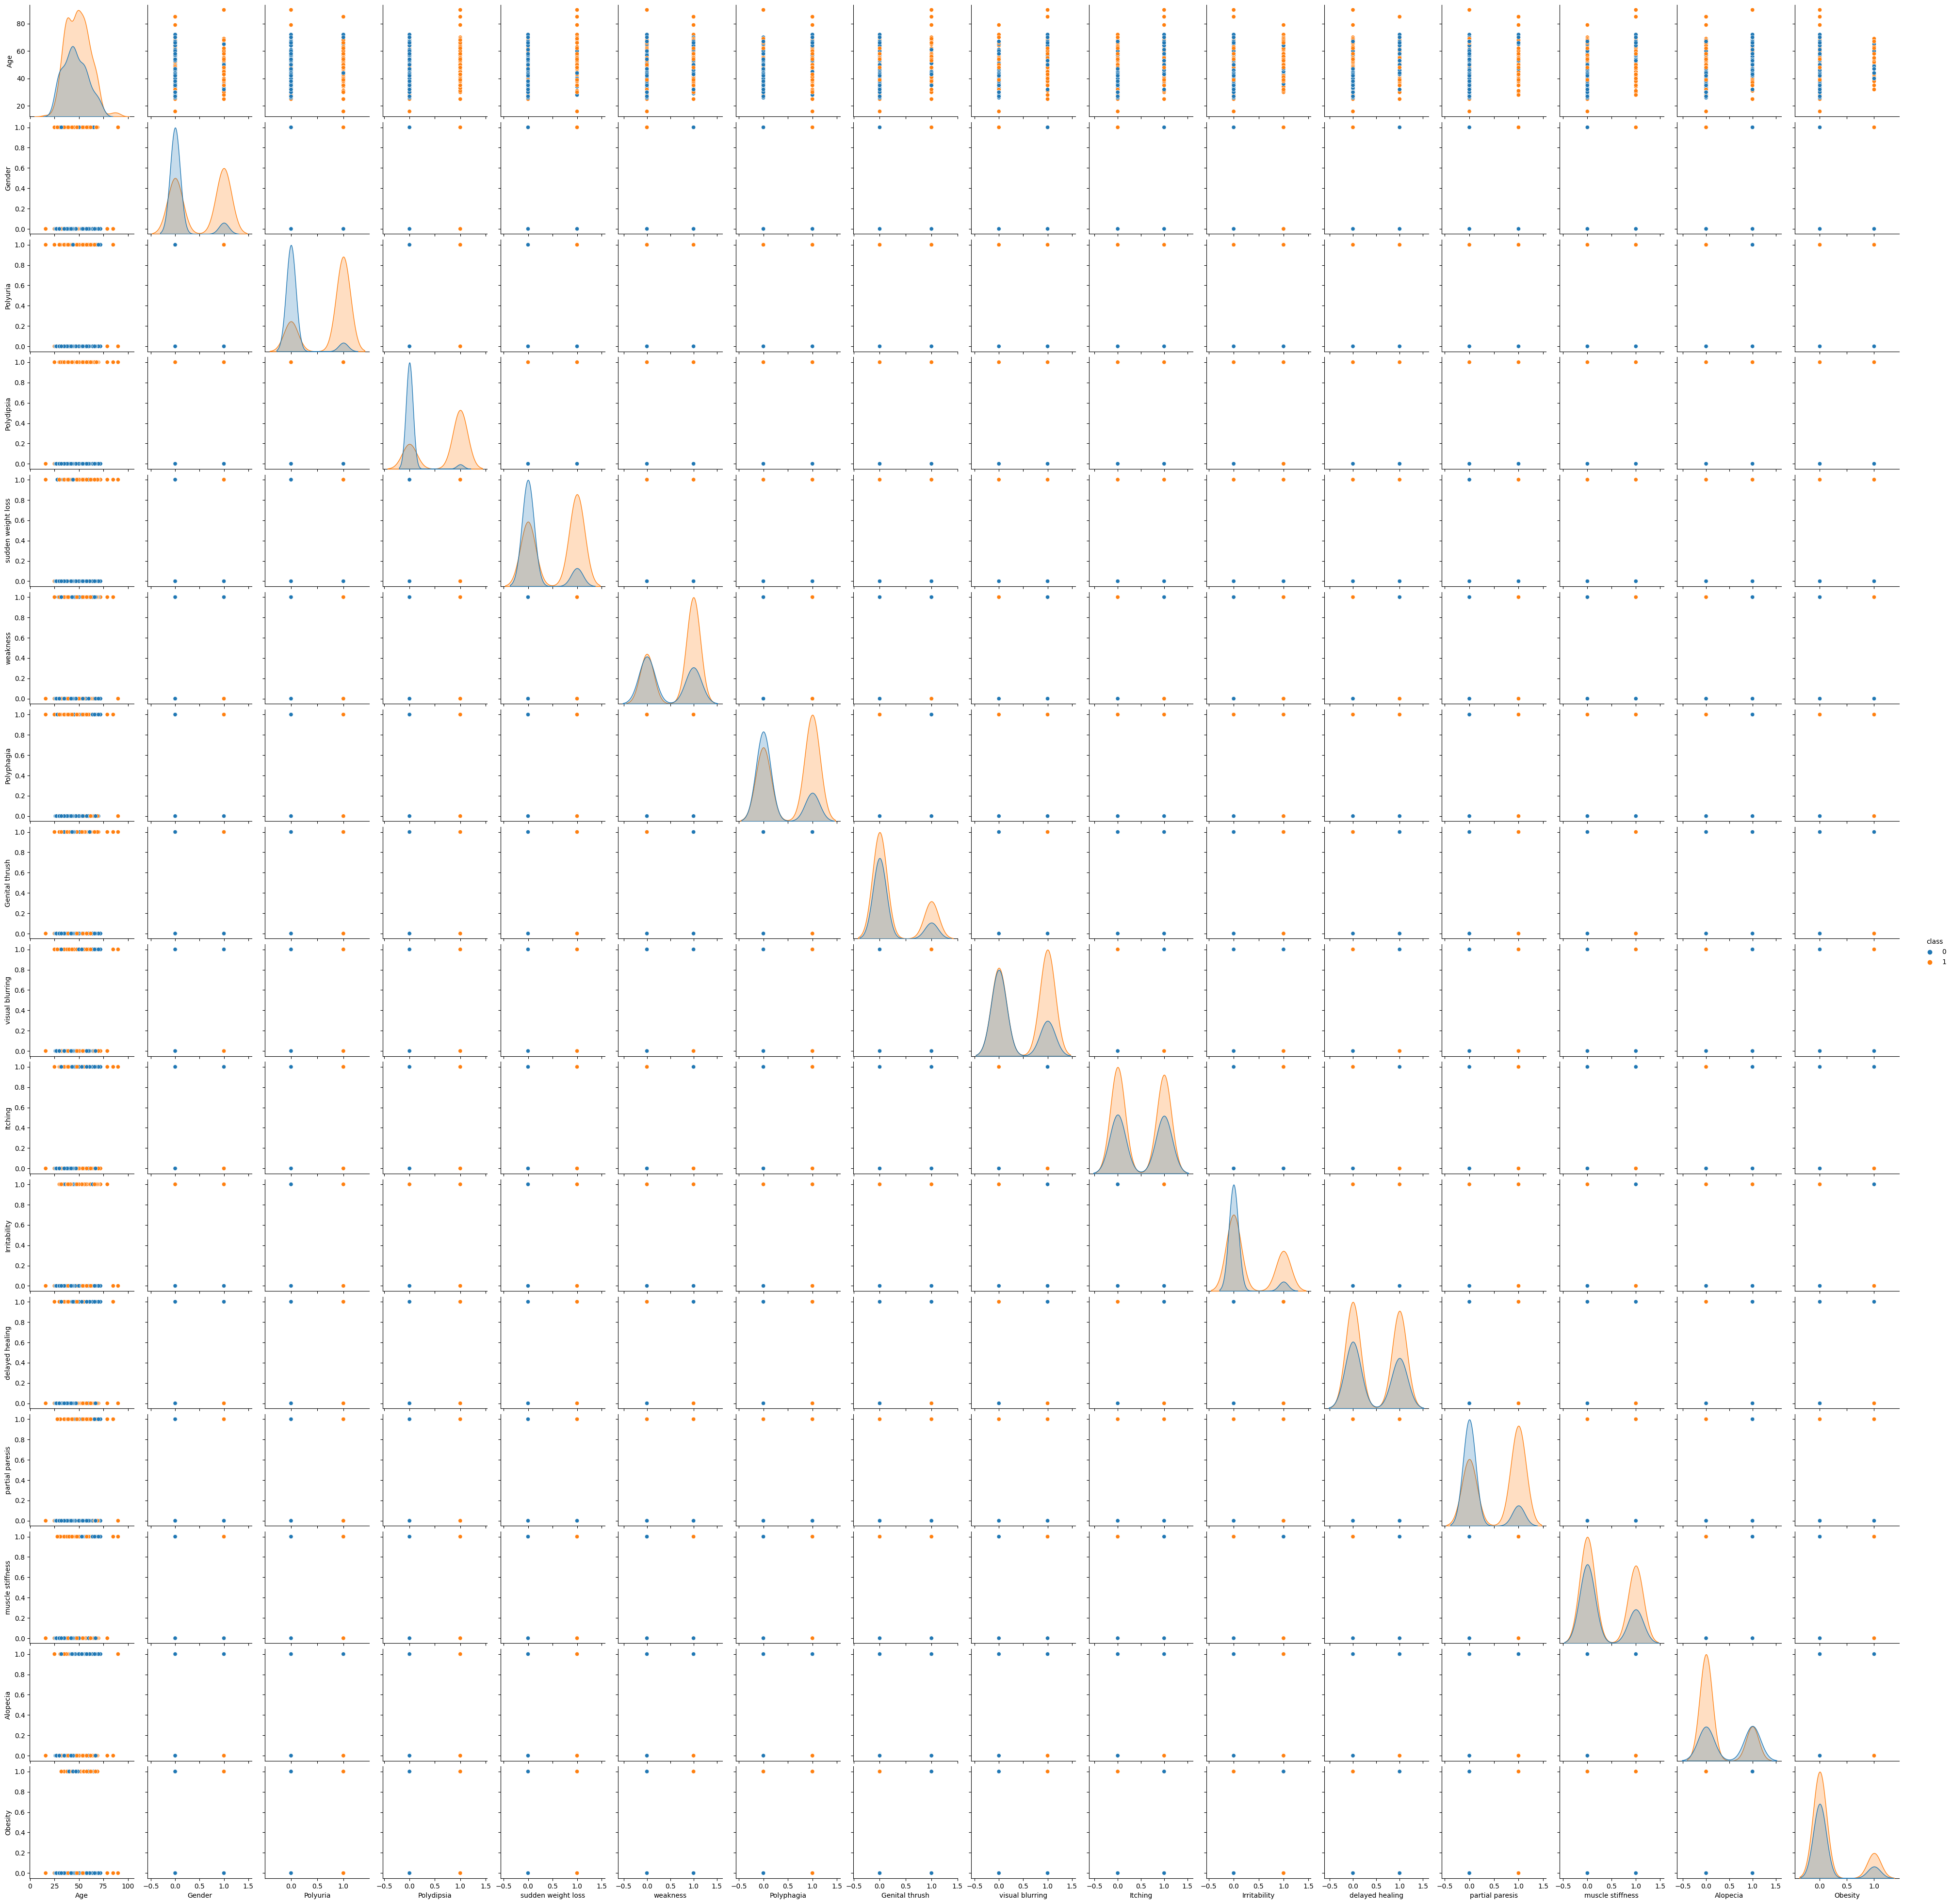

In [8]:
#pair plot
# sns.pairplot(data=data,hue='class')
# plt.show()

In [9]:
#corelation matrix 
#already done

In [12]:
#split data into target and input X and y
y = data['class']
X = data.drop('class',axis=1)
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [13]:
# apply feature scaling 
# not relevant  types: standard scaler, normalizer, minmax scaler and binarizer
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# SSX = scaler.transform(X)

In [15]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [17]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((416, 16), (416,), (104, 16), (104,))

In [18]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)


GaussianNB()

In [21]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy')

In [33]:
#making prediction
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)
nb_pred = nb.predict(X_test)
sv_pred = sv.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
from sklearn import metrics

print("lr_pred Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, lr_pred)))
print("knn_pred Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, knn_pred)))
print("nb_pred Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, nb_pred)))
print("sv_pred Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, sv_pred)))
print("dt_pred Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, dt_pred)))
print("rf_pred Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, rf_pred)))

lr_pred Accuracy = 0.923
knn_pred Accuracy = 0.904
nb_pred Accuracy = 0.846
sv_pred Accuracy = 0.596
dt_pred Accuracy = 0.971
rf_pred Accuracy = 0.971
